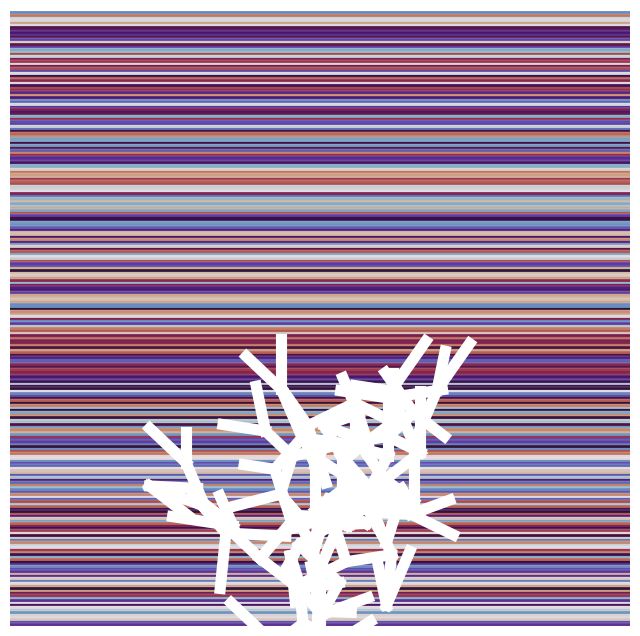

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

class QuantumFractalTree:
    def __init__(self, depth, base_length):
        """
        Inicjalizacja klasy QuantumFractalTree.

        :param depth: Głębokość drzewa fraktalnego.
        :param base_length: Długość podstawowej gałęzi drzewa.
        """
        self.depth = depth
        self.base_length = base_length

    def quantum_random_number(self, bits):
        """
        Generuje losową liczbę z zakresu [0, 1] za pomocą obwodu kwantowego.

        :param bits: Liczba bitów używanych w obwodzie kwantowym.
        :return: Losowa liczba z zakresu [0, 1].
        """
        qc = QuantumCircuit(bits, bits)
        qc.h(range(bits))
        qc.measure(range(bits), range(bits))
        backend = Aer.get_backend('qasm_simulator')
        tqc = transpile(qc, backend)
        qobj = assemble(tqc)
        job = execute(qc, backend)
        result = job.result()
        counts = result.get_counts(qc)
        most_common = max(counts, key=counts.get)
        number = int(most_common, 2) / (2**bits - 1)
        return number

    def draw_tree(self, x, y, angle, depth):
        """
        Rysuje drzewo fraktalne za pomocą rekursji.

        :param x: Współrzędna x początkowego punktu gałęzi.
        :param y: Współrzędna y początkowego punktu gałęzi.
        :param angle: Kąt gałęzi względem poziomu.
        :param depth: Głębokość rekursji.
        """
        if depth > 0:
            angle_shift = self.quantum_random_number(5) * 360
            length_shift = self.base_length * self.quantum_random_number(5)
            x_new = x + (self.base_length + length_shift) * math.cos(math.radians(angle))
            y_new = y + (self.base_length + length_shift) * math.sin(math.radians(angle))
            plt.plot([x, x_new], [y, y_new], 'w-', linewidth=8)
            self.draw_tree(x_new, y_new, angle - angle_shift, depth - 1)
            self.draw_tree(x_new, y_new, angle + angle_shift, depth - 1)

    def generate_tree(self):
        """
        Generuje i wyświetla drzewo fraktalne z gradientem w tle.
        """
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        plt.axis('off')

        # Dodanie płynnego gradientu w tle
        gradient_colors = plt.get_cmap('twilight_shifted')(np.linspace(0, 1, 256))
        for i in range(256):
            color = gradient_colors[int(self.quantum_random_number(8) * 255)]
            ax.axhline(y=i/256, color=color, xmin=0, xmax=1, linewidth=2)

        self.draw_tree(0.5, 0, 90, self.depth)
        plt.show()

# Użycie klasy
tree = QuantumFractalTree(depth=7, base_length=0.05)
tree.generate_tree()